In [42]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.interpolate import interp1d
from fractions import Fraction
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt

In [12]:
hypos = np.linspace(0, 1, 101)
pmf = Pmf(1, hypos)
data = 140, 250

In [13]:
def update_binomial(pmf, data):
    k, n = data
    xs = pmf.qs
    likelihood = ss.binom.pmf(k, n, xs)
    post_pmf = pmf * likelihood
    post_pmf.normalize()
    return post_pmf

In [14]:
pmf2 = update_binomial(pmf, data)
pmf2

,probs
0.00,0.000000e+00
0.01,1.256330e-207
0.02,5.731921e-166
0.03,8.338711e-142
0.04,8.269265e-125
...,...
0.96,2.107677e-83
0.97,1.624102e-96
0.98,2.911941e-115
0.99,9.293081e-148


In [16]:
cumul = pmf2.cumsum()
cumul

0.00     0.000000e+00
0.01    1.256330e-207
0.02    5.731921e-166
0.03    8.338711e-142
0.04    8.269265e-125
            ...      
0.96     1.000000e+00
0.97     1.000000e+00
0.98     1.000000e+00
0.99     1.000000e+00
1.00     1.000000e+00
Name: , Length: 101, dtype: float64

In [19]:
ps = cumul.values
qs = cumul.index
interp = interp1d(ps, qs)
interp(0.96)

array(0.60890171)

In [22]:
cdf = pmf2.make_cdf()
cdf(0.615)

array(0.96383032)

In [21]:
cdf.quantile(0.96)

array(0.61)

In [23]:
def make_dice(sides):
    outcomes = np.arange(1, sides + 1)
    dice = Pmf(1 / sides, outcomes)
    return dice

In [30]:
def add_dist_seq(seq):
    total = seq[0]
    for other in seq[1:]:
        total = Pmf.add_dist(total, other)
    return total

In [33]:
dice = [make_dice(6)] * 3
pmf_3d6 = add_dist_seq(dice)

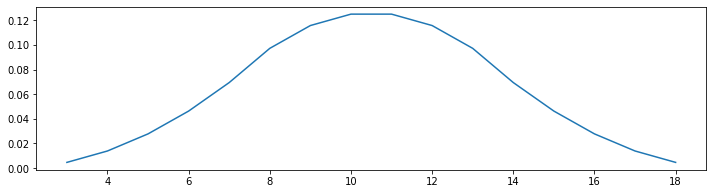

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(pmf_3d6)

In [35]:
n = 10000
a = np.random.randint(1, 7, size=(n, 4))
a

array([[5, 4, 1, 6],
       [1, 1, 6, 4],
       [2, 3, 1, 5],
       ...,
       [1, 2, 5, 1],
       [5, 3, 5, 6],
       [2, 3, 2, 3]])

In [36]:
a.sort(axis=1)
a

array([[1, 4, 5, 6],
       [1, 1, 4, 6],
       [1, 2, 3, 5],
       ...,
       [1, 1, 2, 5],
       [3, 5, 5, 6],
       [2, 2, 3, 3]])

In [38]:
t = a[:, 1:].sum(axis=1)

In [39]:
pmf_best3 = Pmf.from_seq(t)

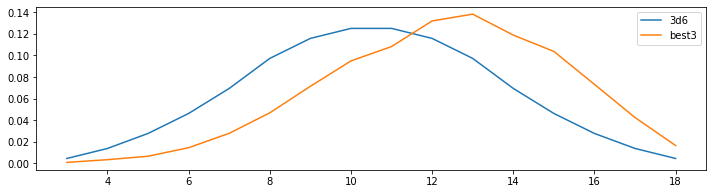

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(pmf_3d6, label='3d6')
ax.plot(pmf_best3, label='best3')
plt.legend()
plt.show()

In [41]:
cdf_best3 = pmf_best3.make_cdf()

In [43]:
cdf_max6 = Cdf(cdf_best3 ** 6)
cdf_max6

,probs
3,1.000000e-18
4,8.303766e-15
5,1.973823e-12
6,2.949295e-10
7,2.397981e-08
8,1.036544e-06
9,2.589230e-05
10,3.614860e-04
11,2.785367e-03
12,1.698430e-02


In [44]:
cdf_max6 == cdf_best3.max_dist(6)


3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
Name: , dtype: bool

In [47]:
prob_gt = 1 - cdf_best3
prob_gt6 = prob_gt ** 6
prob_le6 = 1 - prob_gt6

In [48]:
cdf_min6 = Cdf(prob_le6)
cdf_min6

,probs
3,0.005985
4,0.026698
5,0.065346
6,0.145152
7,0.281920
8,0.470681
9,0.677758
10,0.844769
11,0.940453
12,0.985642


In [49]:
np.allclose(cdf_min6, cdf_best3.min_dist(6))

True